In [ ]:
#  lesson 1 codes in class review
# first time using the jupyter note book

In [5]:
## Answers for Assignment 1
##1. Applications used AI methods: Google homemini, self-check-out machine, self-driving cars
##2. Probability Model:
## Pr(A|B)= (Pr(B|A)*Pr(A))/Pr(B)
##3. Scenarios used probability model: email trash fileter, training robot undertanding, words gussing in search engines
##4. Probability model ususlly used to calculate the posibility of events happening in scinarios. the difficults are:
## 1. if the campared source is not enough, the probabilities of the events are not accurate.
## 2. the relationship between events are not stable, in different sources, therefore, the results are vary.
##5. Language Model: probability distribution over the whole string of words. A string with length m, the probability of 
## Pr(w1,...,Wm) to the whole sequence.
##6. Applications used language Model: machine translation, speech recognation, character recognation
##7. 1-gram Language Model is the word probability is independence to others in a sequence, Pr(W1)
##8. Advantages: calculate is simple and fast.
##   Disadvantages: not accurate, difficult to apply when need to compare.
##9.2-gram Model: a words language probability is only ralated to the one next to it. Pr(wn|w1..wn-1)~Pr(wn|wn-1)



In [38]:
my_grammar = '''
Alien = 寒暄 报名 动作 业务相关
报名 = 我是 名字
名字 = 娜美 | 天使 | 星人 | 蒸汽 | 地球 |美女
动作 = 动词 形容词组 名字
动词 = 造访 | 考察 | 勾搭 | 毁灭 | 吃
形容词组 = null | 形容词 形容词对
形容词对 = null | 形容词
形容词 = 蓝色的 | 绚烂的 | 美味的 | 漆黑的 | 不正经的
业务相关 = 动词 形容词 名字
寒暄 = 你好, | 您好, | 初次相见,
'''

In [39]:
another_grammar ='''
twister =  动作 是否 动作 结果
动作 = 动词 形容词 名词
动词 = 吃 | 吐 | 来 | 去 | 上 | 下
形容词 = 红 | 绿 | 蓝
是否 = 是 | 不
名词 = 葡萄 | 哑巴 | 喇嘛 | 塔玛 | 葡萄皮
结果 = 名词
'''

In [40]:
import random

In [41]:
def create_grammar(grammar_str, split='=', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue # if the line is empty go on next
        move, state = line.split(split)
        grammar[move.strip()] = [s.split() for s in state.split('|')]
    return grammar
        

In [42]:
create_grammar(my_grammar)

{'Alien': [['寒暄', '报名', '动作', '业务相关']],
 '业务相关': [['动词', '形容词', '名字']],
 '动作': [['动词', '形容词组', '名字']],
 '动词': [['造访'], ['考察'], ['勾搭'], ['毁灭'], ['吃']],
 '名字': [['娜美'], ['天使'], ['星人'], ['蒸汽'], ['地球'], ['美女']],
 '寒暄': [['你好,'], ['您好,'], ['初次相见,']],
 '形容词': [['蓝色的'], ['绚烂的'], ['美味的'], ['漆黑的'], ['不正经的']],
 '形容词对': [['null'], ['形容词']],
 '形容词组': [['null'], ['形容词', '形容词对']],
 '报名': [['我是', '名字']]}

In [43]:
import random

In [44]:
def generate(gram, target):
    if target in gram:
        expand = random.choice(gram[target])
        result = [generate(gram, tar) for tar in expand]
        return ''.join([e if e != '\n' else '/n' for e in result if e != 'null'])
    else:
        return target
        
        

In [53]:
def generate_n(n, grammar_string, target):
    result = []
    for i in range(n):
        result.append(generate(create_grammar(grammar_string), target))
    return result

In [54]:
print(generate(create_grammar(my_grammar), target= 'Alien'))

您好,我是美女勾搭美味的娜美考察不正经的蒸汽


In [55]:
print(generate_n(7, my_grammar, 'Alien'))

['初次相见,我是天使考察漆黑的美女造访绚烂的娜美', '你好,我是娜美吃美女吃漆黑的蒸汽', '你好,我是天使吃蓝色的蓝色的地球毁灭美味的娜美', '你好,我是娜美造访天使吃不正经的天使', '你好,我是天使勾搭美味的美女考察不正经的娜美', '你好,我是蒸汽毁灭不正经的娜美勾搭漆黑的地球', '您好,我是娜美毁灭漆黑的天使考察漆黑的蒸汽']


In [56]:
filename = 'C:/Users/Jing/Downloads/trainfiles/train.txt'

In [57]:
import pandas as pd
content = pd.read_csv(filename, sep='，', encoding='utf-8')

In [58]:
content.head()

,0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ++$++ Is Disability Insurance Required By Law?
0,1 ++$++ life-insurance ++$++ 债权人可以在死后人寿保险吗？ ++...
1,2 ++$++ renters-insurance ++$++ 旅行者保险有租赁保险吗？ +...
2,3 ++$++ auto-insurance ++$++ 我可以开一辆没有保险的新车吗？ +...
3,4 ++$++ life-insurance ++$++ 人寿保险的现金转出价值是否应纳税？...
4,5 ++$++ annuities ++$++ 如何报告年金收入？ ++$++ How I...


In [59]:
articles= content.values.tolist()

In [60]:
len(articles)

12888

In [61]:
articles[0]

['1 ++$++ life-insurance ++$++ 债权人可以在死后人寿保险吗？ ++$++ Can  Creditors  Take  Life  Insurance  After  Death?']

In [62]:
articles[0][0]

'1 ++$++ life-insurance ++$++ 债权人可以在死后人寿保险吗？ ++$++ Can  Creditors  Take  Life  Insurance  After  Death?'

In [63]:
def extract_words(articles):
    articles_clean = ''
    for i in range(len(articles)):
        articles_clean= articles_clean + articles[i][0].split('++$++')[2]
    return articles_clean


In [64]:
articles_clean = extract_words(articles)

In [65]:
import re

In [66]:
def token(string):
    return re.findall('\w+', string)

In [67]:
article = ''.join(token(articles_clean))

In [68]:
from collections import Counter

In [69]:
import jieba

In [70]:
with_jieba_cut = Counter(jieba.cut(article))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jing\AppData\Local\Temp\jieba.cache
Loading model cost 3.860 seconds.
Prefix dict has been built succesfully.


In [71]:
with_jieba_cut.most_common()[:10]

[('保险', 5004),
 ('的', 3220),
 ('人寿保险', 2962),
 ('什么', 2677),
 ('吗', 2478),
 ('是', 2347),
 ('我', 2056),
 ('是否', 1862),
 ('可以', 1704),
 ('健康', 1513)]

In [72]:
with open('train_cut.txt', 'w') as f:
   for a in with_jieba_cut:
    f.write(a)

In [73]:
frequences = [f for w, f in with_jieba_cut.most_common(100)]

In [74]:
x = [i for i in range(100) ]

In [75]:
%matplotlib inline

In [76]:
import matplotlib.pyplot as plt

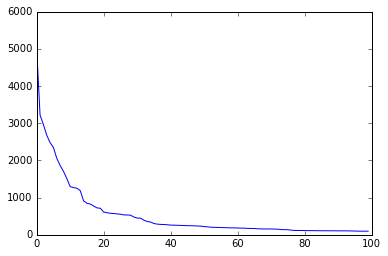

In [77]:
plt.plot(x, frequences)

In [78]:
def prob1(target):
    return with_jieba_cut[target] / len(with_jieba_cut)

In [79]:
prob1('我们')

0.014325207338527268

In [80]:
prob1('吃饭')

0.0

In [81]:
TOKEN = [str(t) for t in with_jieba_cut]

In [82]:
TOKEN[:10]

['抚恤金', '年龄', '资源', '问题', '死亡', '奇尼', '病毒', '公共', '中', 'LPC']

In [83]:
TOKEN2 = [''.join(TOKEN[i: i+2]) for i in range(len(TOKEN[:-2]))]

In [84]:
TOKEN2[:10]

['抚恤金年龄',
 '年龄资源',
 '资源问题',
 '问题死亡',
 '死亡奇尼',
 '奇尼病毒',
 '病毒公共',
 '公共中',
 '中LPC',
 'LPCCSV']

In [85]:
words_count_2 = Counter(TOKEN2)

In [86]:
def prob2(word1, word2):
    if word1+ word2 in words_count_2:
        return (words_count_2(word1+word2)/len(TOKEN2)) * prob1(word1) / prob1(word2)
    else:
        return (prob1(word1) + prob1(word2)) / 2

In [87]:
import jieba

In [88]:
def cut(string):
    return list(jieba.cut(string))

In [89]:
cut('我在吃午饭')

['我', '在', '吃', '午饭']

In [90]:
def sentence_probability(sentence):
    words = cut(sentence)
    for i, word in enumerate(sentence[:-1]):
        next_ = sentence[i+1]
        sentence_prob = 1
        probability = prob2(word, next_)
        sentence_prob *= probability
    return sentence_prob
        

In [91]:
sentence_probability('小明今天没有抽到波音飞机')

0.0003769791404875597

In [109]:
def best_sentence(sentences):
    result = []
    scores = {}
    for s in sentences:
        result.append(sentence_probability(s))
        scores[s] = sentence_probability(s)
    high = sorted(result, reverse= True)[0]
    for key in scores:
        if scores[key] == high:
            return key
    

In [110]:
example = generate_n(7, my_grammar, 'Alien')

In [111]:
example

['您好,我是星人吃漆黑的蓝色的星人造访绚烂的蒸汽',
 '您好,我是地球吃绚烂的漆黑的星人造访蓝色的星人',
 '你好,我是星人吃不正经的娜美考察不正经的美女',
 '你好,我是蒸汽考察漆黑的美女吃漆黑的娜美',
 '你好,我是星人勾搭星人毁灭美味的美女',
 '你好,我是星人吃蒸汽勾搭蓝色的天使',
 '您好,我是天使考察美女吃美味的星人']

In [112]:
print(best_sentence(example))

您好,我是天使考察美女吃美味的星人


In [60]:
for sen in [generate(gram=create_grammar(simple_grammar), target='sentence') for i in range(10)]:
    print('sentence {} with prb {}'.format(sen, sentence_probability(sen)))

sentence 这个桌子听着这个篮球下边 with prb 0.002764513696908771
sentence 一个女人看着这个小小的小小的小小的小猫旁边 with prb 0.0
sentence 一个桌子看着一个蓝色的小猫上面 with prb 0.013696908771048002
sentence 一个篮球听着一个好看的小猫旁边 with prb 0.0
sentence 一个女人坐在这个篮球下边 with prb 0.002764513696908771
sentence 这个小猫看着这个蓝色的好看的蓝色的好看的小猫上面 with prb 0.013696908771048002
sentence 一个女人看见一个小猫上面 with prb 0.013696908771048002
sentence 一个蓝色的桌子坐在一个蓝色的蓝色的蓝色的篮球下边 with prb 0.002764513696908771
sentence 这个女人听着这个好看的好看的好看的小猫下边 with prb 0.002764513696908771
sentence 这个小猫听着一个蓝色的篮球旁边 with prb 0.0
